# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import requests
import datetime

# Import API key
from config import OpenWeather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-100, 100)
lng_range = (-180, 100)

## Generate Cities List

In [63]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-100.000, high=100.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=100.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

550

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
City_ID = "City ID"

query_url = f"{url}appid={api_key}&units={units}&q="
#for city in cities:
response = requests.get(query_url + "Boise").json()
    
pprint(response)


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 43.61, 'lon': -116.2},
 'dt': 1584209099,
 'id': 5586437,
 'main': {'feels_like': 2.76,
          'humidity': 93,
          'pressure': 1010,
          'temp': 5.76,
          'temp_max': 7.22,
          'temp_min': 2.78},
 'name': 'Boise',
 'sys': {'country': 'US',
         'id': 4829,
         'sunrise': 1584194265,
         'sunset': 1584237000,
         'type': 1},
 'timezone': -21600,
 'visibility': 14484,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 2.6}}


In [65]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


City = []
City_ID = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

query_url = f"{url}appid={api_key}&units={units}&q="

index = 0

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        MaxTemp.append(response["main"]["temp_max"])
        WindSpeed.append(response["wind"]["speed"])
        City_ID = response["sys"]["id"]
        index = index + 1
        print(f"{city} found!")
        #print(City)
        #print(Cloudiness)
        print(City_ID)
    # Handle exceptions for a city that is not found in API
    except:
        # Append null values
        print("CITY NOT FOUND! MOVE TO NEXT CITY!")
        pass
    

CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
blacksburg found!
3396
CITY NOT FOUND! MOVE TO NEXT CITY!
chapais found!
859
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
kapaa found!
7873
faya found!
7396
campoverde found!
8675
eureka found!
3217
bereda found!
6403
narsaq found!
47
CITY NOT FOUND! MOVE TO NEXT CITY!
cape town found!
1899
puerto ayora found!
8521
longyearbyen found!
1663
pacifica found!
5817
ushuaia found!
8303
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
bredasdorp found!
1966
vaini found!
7285
CITY NOT FOUND! MOVE TO NEXT CITY!
porto novo found!
1119
mataura found!
2008959
barcelos found!
6900
barrow found!
7649
port-gentil found!
2188
CITY NOT FOUND! MOVE TO NEXT CITY!
oulainen found!
2002648
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
saint-philippe found!
2127
CITY 

gallup found!
5707
CITY NOT FOUND! MOVE TO NEXT CITY!
terrace found!
984
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
quatre cocos found!
2061
coquimbo found!
8514
CITY NOT FOUND! MOVE TO NEXT CITY!
morrope found!
8680
grojec found!
1713
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
makakilo city found!
7878
marawi found!
2007154
bambous virieux found!
2061
CITY NOT FOUND! MOVE TO NEXT CITY!
soldotna found!
7806
hayden found!
3813
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
holme found!
1571
sterling found!
4481
CITY NOT FOUND! MOVE TO NEXT CITY!
champerico found!
7068
sitka found!
7685
klaksvik found!
1596
sept-iles found!
1013
norman wells found!
951
conde found!
8391
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
CITY NOT FOUND! MOVE TO NEXT CITY!
s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
# Convert to DataFrame
weather_data = {"City":City, "Cloudiness":Cloudiness, "Country":Country, "Date":Date, "Humidity":Humidity,
                "Lat":Lat, "Lng":Lng, "MaxTemp":MaxTemp, "WindSpeed":WindSpeed}
#weather_data
weather_pd = pd.DataFrame(weather_data)
for x in weather_pd["Date"]:
    weather_pd["Date"] = datetime.datetime.utcfromtimestamp(x)

weather_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Sørland,100,NO,2020-03-14 18:08:57,91,67.67,12.69,3.69,24.02
1,Qaanaaq,0,GL,2020-03-14 18:08:57,60,77.48,-69.36,-28.41,2.15
2,Blacksburg,75,US,2020-03-14 18:08:57,30,37.23,-80.41,15.56,1.77
3,Codrington,61,AU,2020-03-14 18:08:57,74,-38.27,141.97,14.39,7.05
4,Chapais,90,CA,2020-03-14 18:08:57,78,49.78,-74.85,-10.00,6.70
...,...,...,...,...,...,...,...,...,...
502,Nouadhibou,0,MR,2020-03-14 18:08:57,64,20.93,-17.03,23.00,9.30
503,Pangai,100,TO,2020-03-14 18:08:57,80,-19.80,-174.35,27.59,6.08
504,Tromsø,75,NO,2020-03-14 18:08:57,49,69.65,18.96,-4.00,5.10
505,Talnakh,75,RU,2020-03-14 18:08:57,95,69.49,88.40,0.00,12.00


In [67]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_pd.to_csv("weather_data_final.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

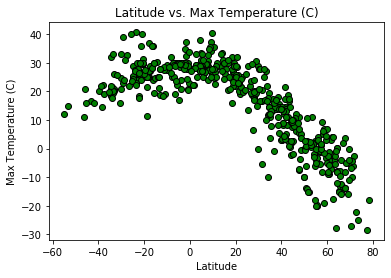

In [85]:
x_axis = Lat
y_axis = MaxTemp
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature (C)")
plt.savefig("../Images/MaxTempPlot.png")

plt.show()

In [ ]:
#Observations:
#Code is analyzing all data points pulled from the OpenWeather API
#Here were are looking at the relationship of the city's latitude vs it's max temperature.  
#Of note is how the apex for max temperature is centered near the equator (even though most data are from the northern hemisphere)

#### Latitude vs. Humidity Plot

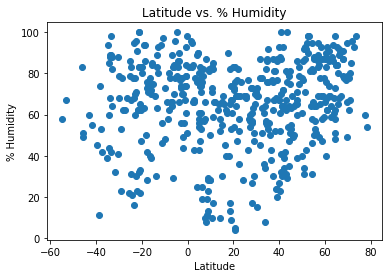

In [86]:
plt.scatter(x_axis, Humidity, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Latitude vs. % Humidity")
plt.savefig("../Images/HumidityPlot.png")

plt.show()

In [ ]:
#Observations:
#Code is analyzing all data points pulled from the OpenWeather API
#Here were are looking at the relationship of the city's latitude vs it's % humidity.  
#Most cities reviewed here have >40% humidity and all have >20% save for one

#### Latitude vs. Cloudiness Plot

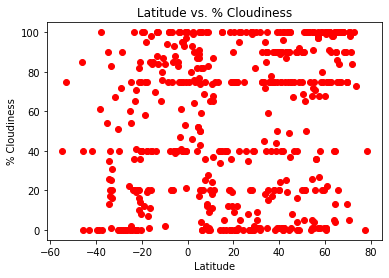

In [87]:
plt.scatter(x_axis, Cloudiness, marker = "o", facecolors = "red")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Latitude vs. % Cloudiness")
plt.savefig("../Images/CloudinessPlot.png")

plt.show()

In [ ]:
#Observations:
#Code is analyzing all data points pulled from the OpenWeather API
#Here were are looking at the relationship of the city's latitude vs it's %Cloudiness.  
#Cloudiness seems to be an objective measurement as there appear to be bands of data around 100%, 75%, 40%, 20% and 0% cloudiness

#### Latitude vs. Wind Speed Plot

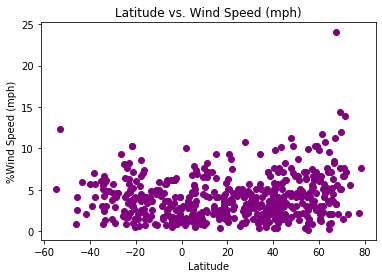

In [88]:
plt.scatter(x_axis, WindSpeed, marker = "o", facecolor = "purple")
plt.xlabel("Latitude")
plt.ylabel("%Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.savefig("../Images/WindSpeedPlot.png")

plt.show()

In [ ]:
#Observations:
#Code is analyzing all data points pulled from the OpenWeather API
#Here were are looking at the relationship of the city's latitude vs it's wind speed in miles per hour.  
#Almost all cities analyzed have below 10 mph wind speeds

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots

In [49]:
# Create Northern and Southern Hemisphere DataFrames
North_df = weather_pd[weather_pd["Lat"] >= 0]
North_df.head()

South_df = weather_pd[weather_pd["Lat"] < 0]
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Rikitea,96,PF,1584197314,73,-23.12,-134.97,25.35,5.08
1,San Juan,70,AR,1584197113,29,-31.54,-68.54,24.15,10.77
2,Bahía Blanca,0,AR,1584197315,25,-38.72,-62.27,21.65,4.88
6,Punta Arenas,75,CL,1584197315,81,-53.15,-70.92,11.00,4.10
8,Constitución,89,CL,1584197315,37,-35.33,-72.42,19.75,4.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8738958890709229


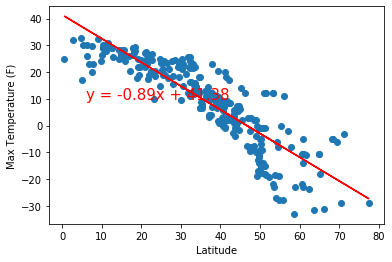

In [89]:
# Add the linear regression equation and line to plot
x_values = North_df["Lat"]
y_values = North_df["MaxTemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/NorthMaxTempPlot.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3890270829742777


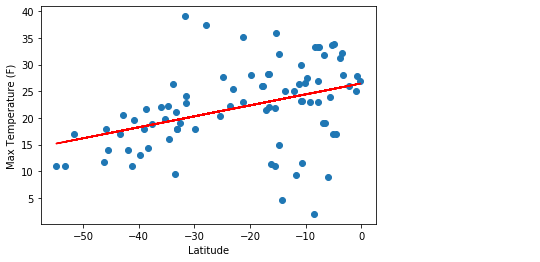

In [90]:
# Add the linear regression equation and line to plot
x_values = South_df["Lat"]
y_values = South_df["MaxTemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/SouthMaxTempPlot.png")

plt.show()

In [ ]:
#As expected, the relationship bewteen latitude and max temp is inversely related for Nothern hemisphere cities
#since as latitude increases, you are getting further away from the equator and temperatures are decreasing.
#Whereas the relationship is positive for the Southern hemisphere (although suprisingly not as significant -- not enough cities?)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.005603379634339296


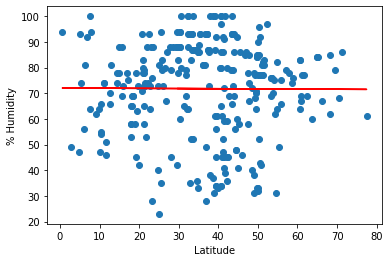

In [93]:
# Add the linear regression equation and line to plot
x_values = North_df["Lat"]
y_values = North_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/NorthHumidityPlot.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.369030593005875


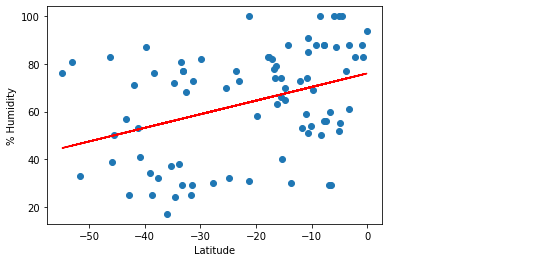

In [94]:
# Add the linear regression equation and line to plot
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/SouthHumidityPlot.png")

plt.show()

In [91]:
#There is no relationship between latitude and % humidity for the analyzed Northern cities and a slight postive one for 
#the Southern hemisphere cities  -- but again, this is likely due to fewer cities being analyzed in the SH

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13006006471493997


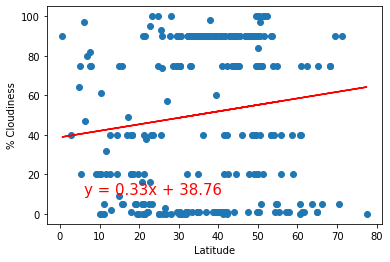

In [95]:
# Add the linear regression equation and line to plot
x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/NorthCloudsPlot.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3037218548356174


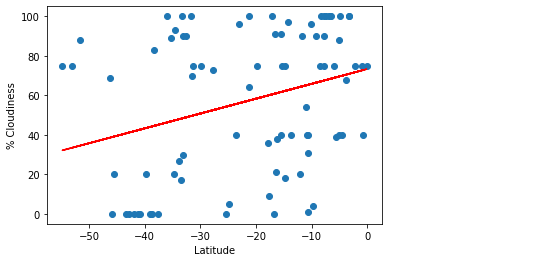

In [96]:
# Add the linear regression equation and line to plot
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/SouthCloudsPlot.png")

plt.show()

In [ ]:
#There is very little relationship between latitude and % cloudiness for the analyzed Northern cities and a slight postive one for 
#the Southern hemisphere cities -- but again, this is likely due to fewer cities being analyzed in the SH

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12227025502083985


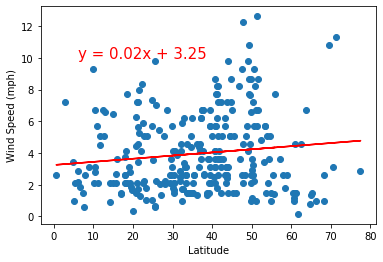

In [97]:
# Add the linear regression equation and line to plot
x_values = North_df["Lat"]
y_values = North_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/NorthWindPlot.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.40534974729090756


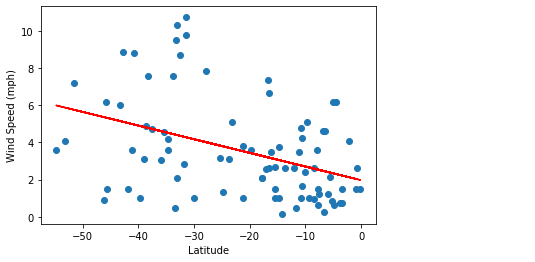

In [98]:
# Add the linear regression equation and line to plot
x_values = South_df["Lat"]
y_values = South_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
plt.savefig("../Images/SouthWindPlot.png")

plt.show()

In [92]:
#The regression plots show that wind speeds slightly increase as you approach the equator, but overall there is very little
#relationship between wind speeds and latitude of a city